In [47]:
import pandas as pd

datos = pd.read_csv("U4_04_train.csv")

In [48]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

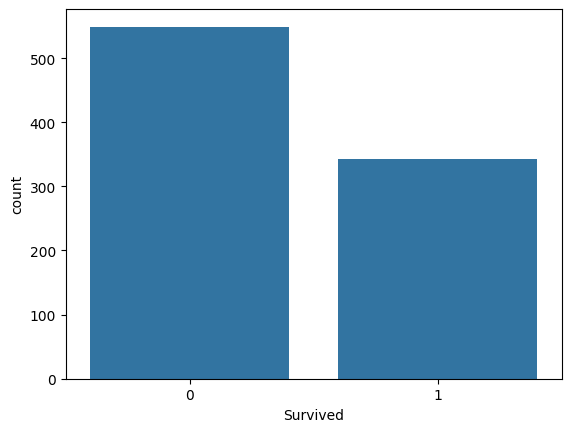

In [50]:
import seaborn as sb

sb.countplot(x="Survived", data=datos)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Survived', ylabel='count'>

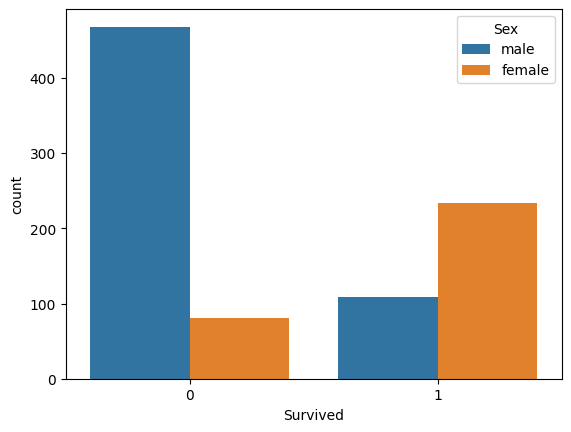

In [51]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [52]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<ipython-input-53-c753c791e7c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(datos["Age"].dropna())


<Axes: xlabel='Age', ylabel='Density'>

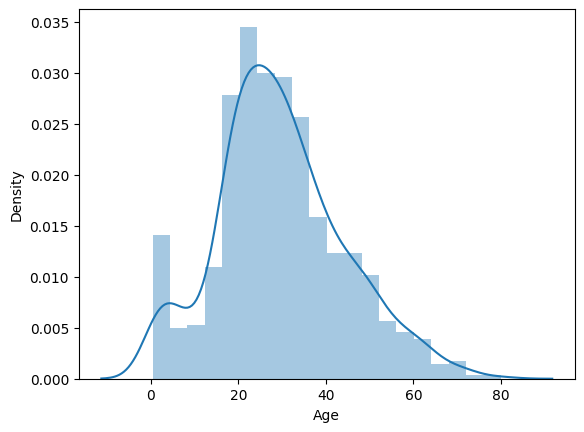

In [53]:
sb.distplot(datos["Age"].dropna())

In [54]:
datos["Age"].fillna(datos["Age"].mean(), inplace=True)

<ipython-input-54-7bbda1c00243>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos["Age"].fillna(datos["Age"].mean(), inplace=True)


In [55]:
datos = datos.drop("Cabin", axis=1)

In [56]:
datos.dropna(inplace=True)

In [57]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [58]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True, dtype=int)

In [59]:
datos = datos.join(dummies_sex)
datos = datos.drop("Sex", axis=1)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Survived', ylabel='count'>

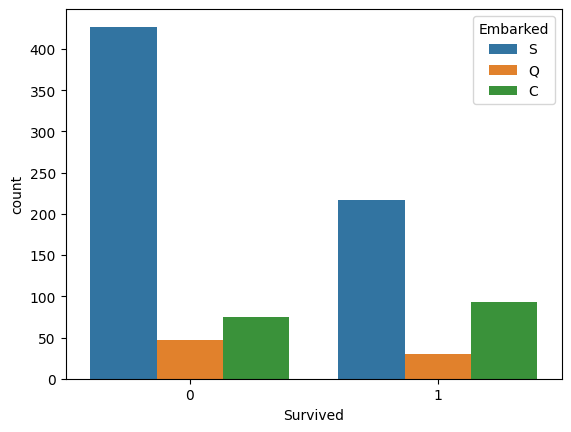

In [60]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [61]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True, dtype=int)
datos = datos.drop("Embarked", axis=1)
datos = datos.join(dummies_embarked)

<Axes: >

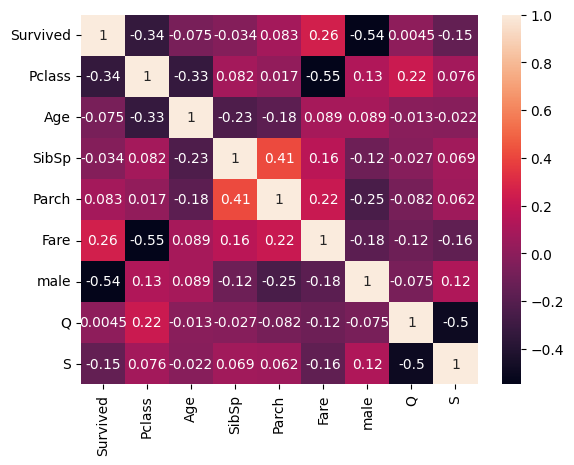

In [63]:
sb.heatmap(datos.corr(), annot=True, )

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Survived', ylabel='count'>

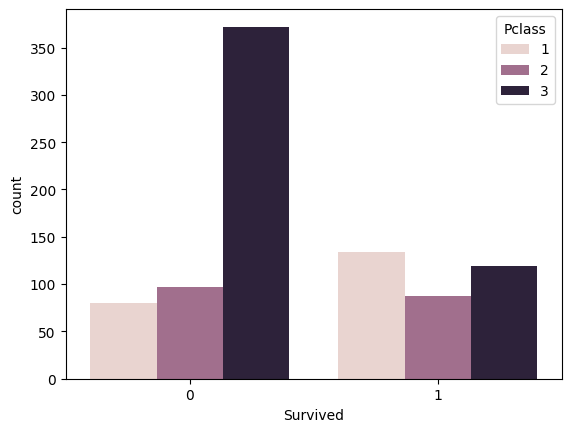

In [64]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [65]:
x = datos.drop("Survived", axis=1)
y = datos["Survived"]

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [67]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
predicciones = logmodel.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, predicciones))


0.8202247191011236


In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.85      0.66      0.75        71

    accuracy                           0.82       178
   macro avg       0.83      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



In [78]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicciones)
pd.DataFrame(confusion_matrix(y_test, predicciones), index=["Pred:No", "Pred:Si"], columns=["Real:No", "Real:Si"])

,Real:No,Real:Si
Pred:No,99,8
Pred:Si,24,47


In [81]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [107]:
nueva_persona = [1,31,1,0,50,0,0,1]
sobrevivio = logmodel.predict([nueva_persona])
if sobrevivio == 1:
  print("Sobrevivio")
else:
  print("Murio")

Sobrevivio


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
